In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image


In [22]:
df = pd.read_csv("shopping.csv")

In [23]:
df.head

<bound method NDFrame.head of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2              

In [24]:
df.shape

(3900, 18)

In [25]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [27]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [28]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

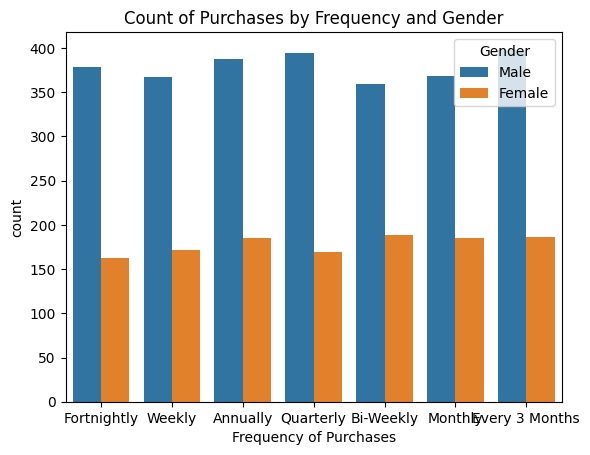

In [44]:
# Create the countplot
sns.countplot(x='Frequency of Purchases', hue='Gender', data=df)

# Add a title
plt.title('Count of Purchases by Frequency and Gender')

# Show the plot
plt.show()


<Axes: xlabel='Payment Method', ylabel='count'>

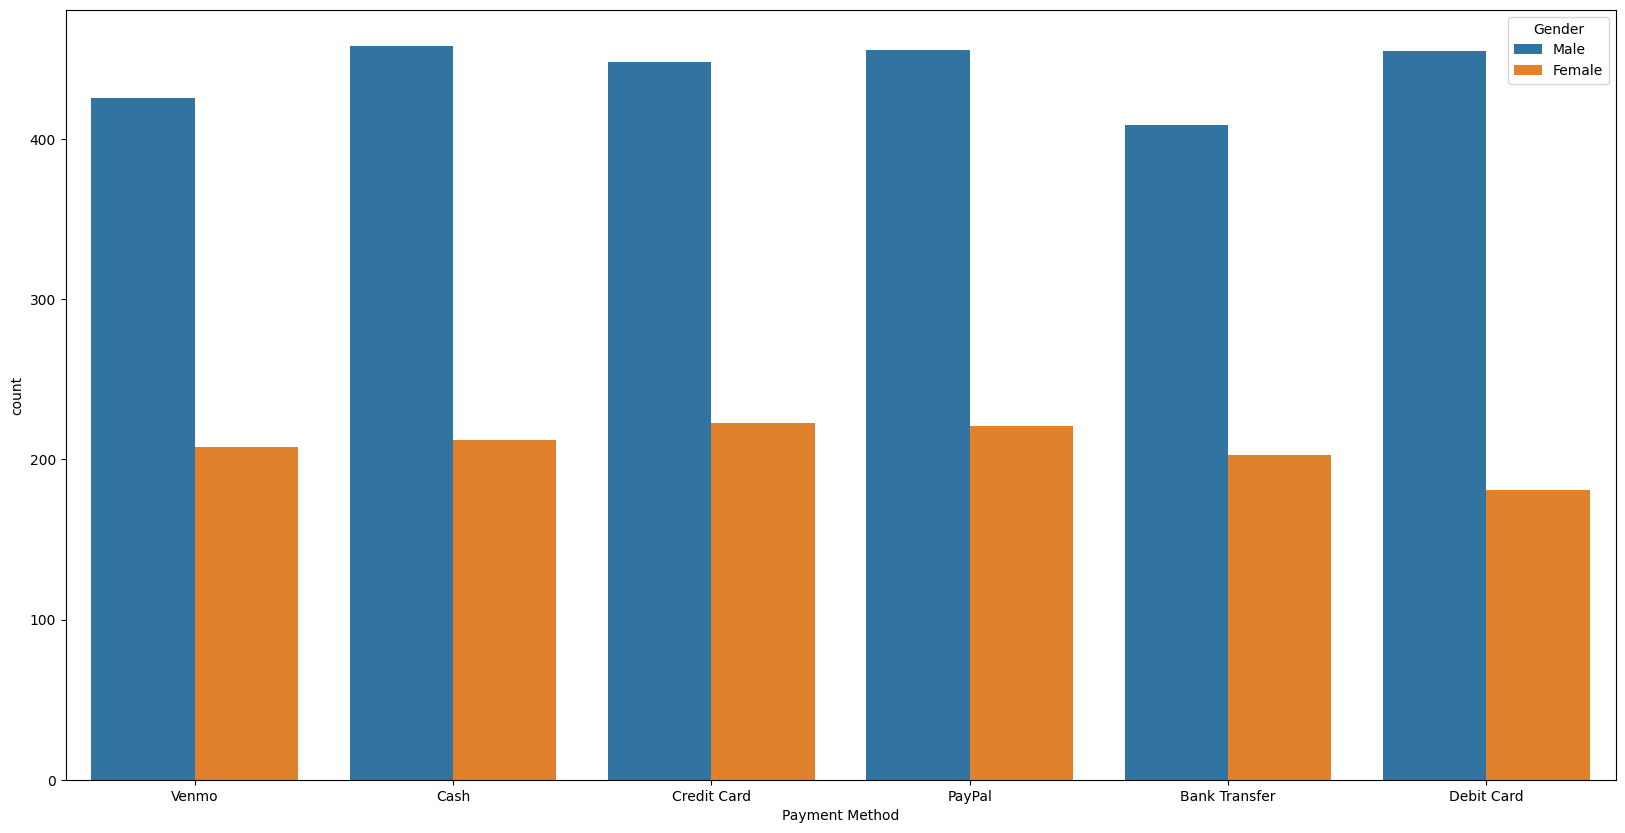

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(x='Payment Method',hue='Gender',data=df)

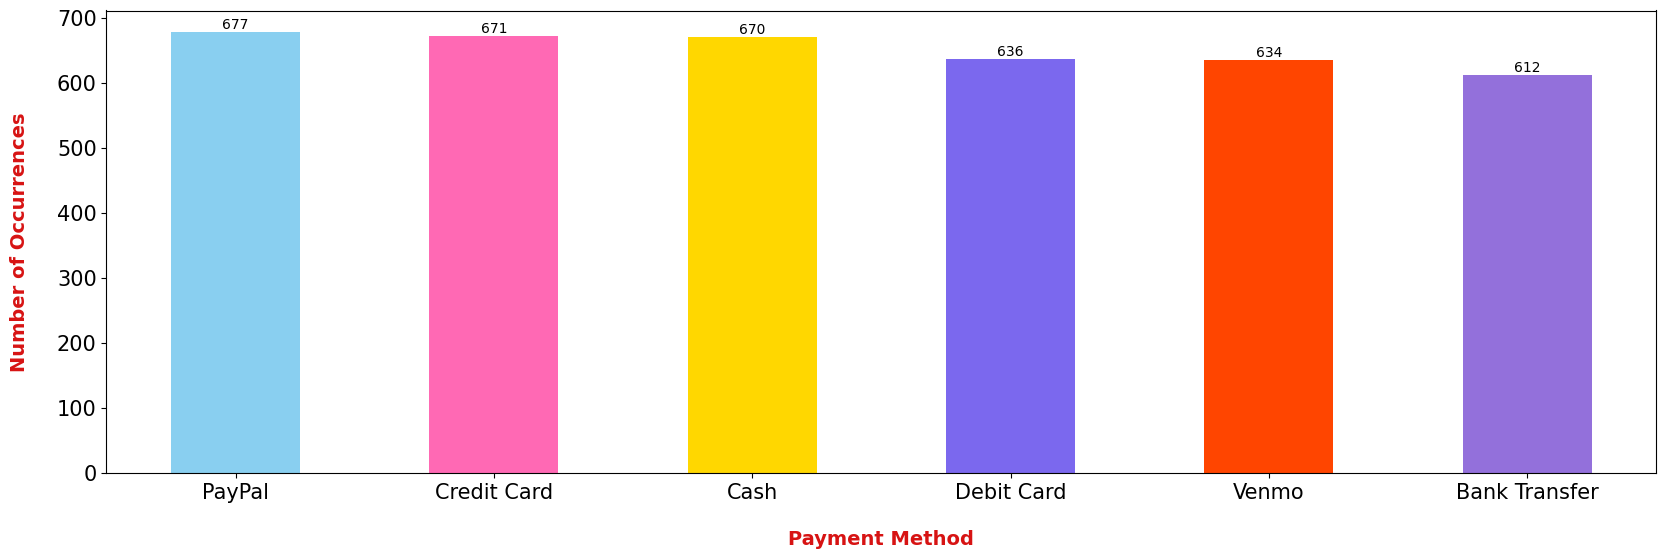

In [32]:
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('PayPal', 'Credit Card', 'Cash', 'Debit Card', 'Venmo', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

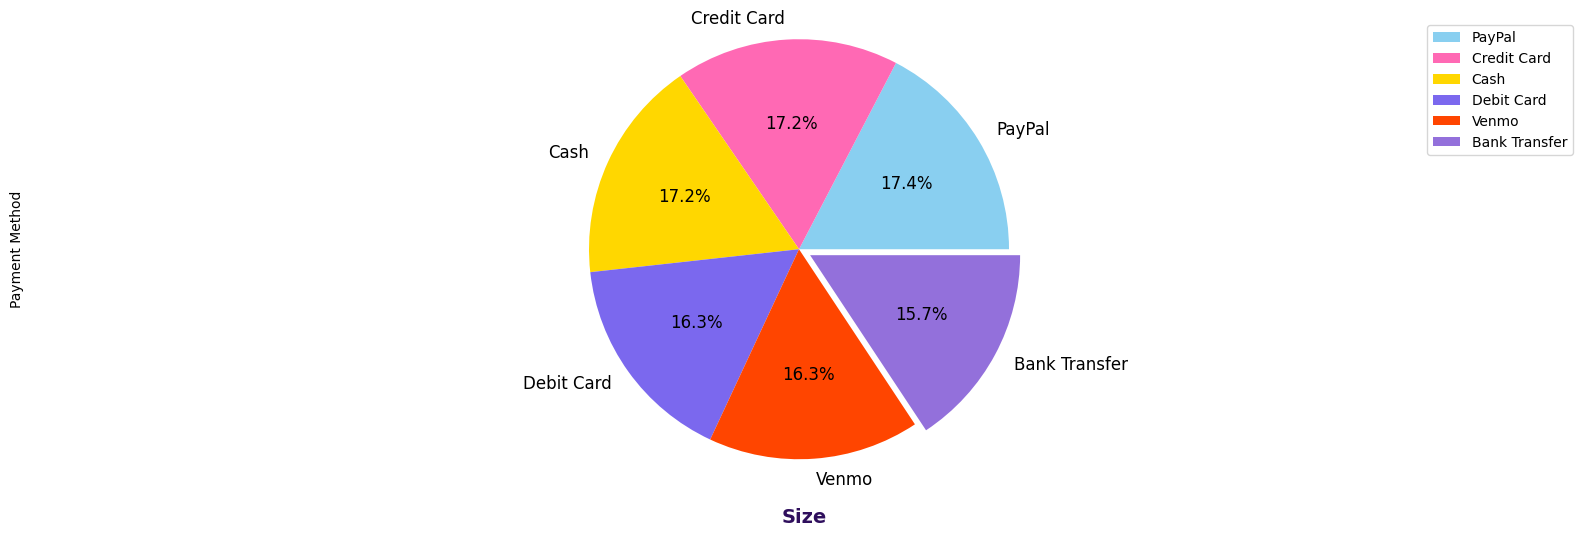

In [33]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

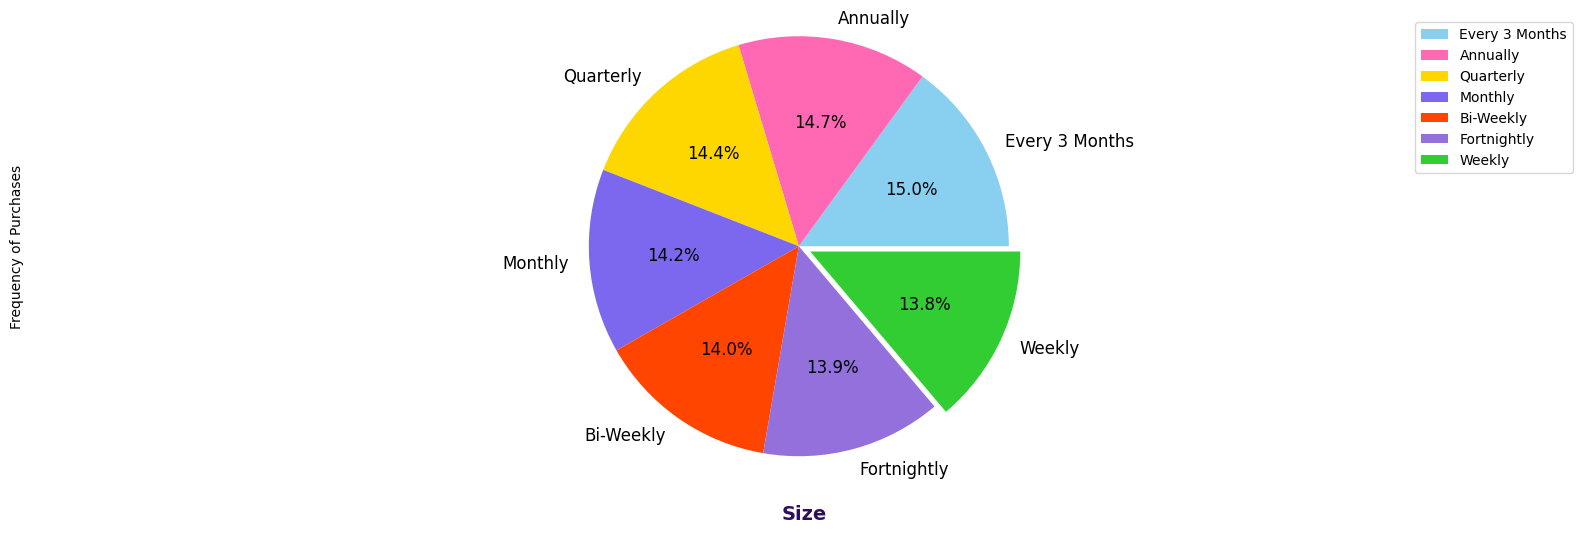

In [34]:
plt.figure(figsize = (20, 6))

counts = df["Frequency of Purchases"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [35]:
most_common_payment_method = df['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: PayPal


In [36]:
avg_purchase_by_color = df.groupby('Color')['Purchase Amount (USD)'].mean()
print("Average Purchase Amount by Color:")
print(avg_purchase_by_color)

Average Purchase Amount by Color:
Color
Beige        60.414966
Black        58.401198
Blue         56.953947
Brown        59.063830
Charcoal     60.633987
Cyan         61.891566
Gold         61.007246
Gray         62.490566
Green        65.704142
Indigo       56.251701
Lavender     59.129252
Magenta      57.131579
Maroon       59.525316
Olive        58.146893
Orange       60.889610
Peach        59.187919
Pink         60.588235
Purple       60.013245
Red          59.317568
Silver       56.832370
Teal         60.808140
Turquoise    55.613793
Violet       61.716867
White        62.640845
Yellow       59.241379
Name: Purchase Amount (USD), dtype: float64


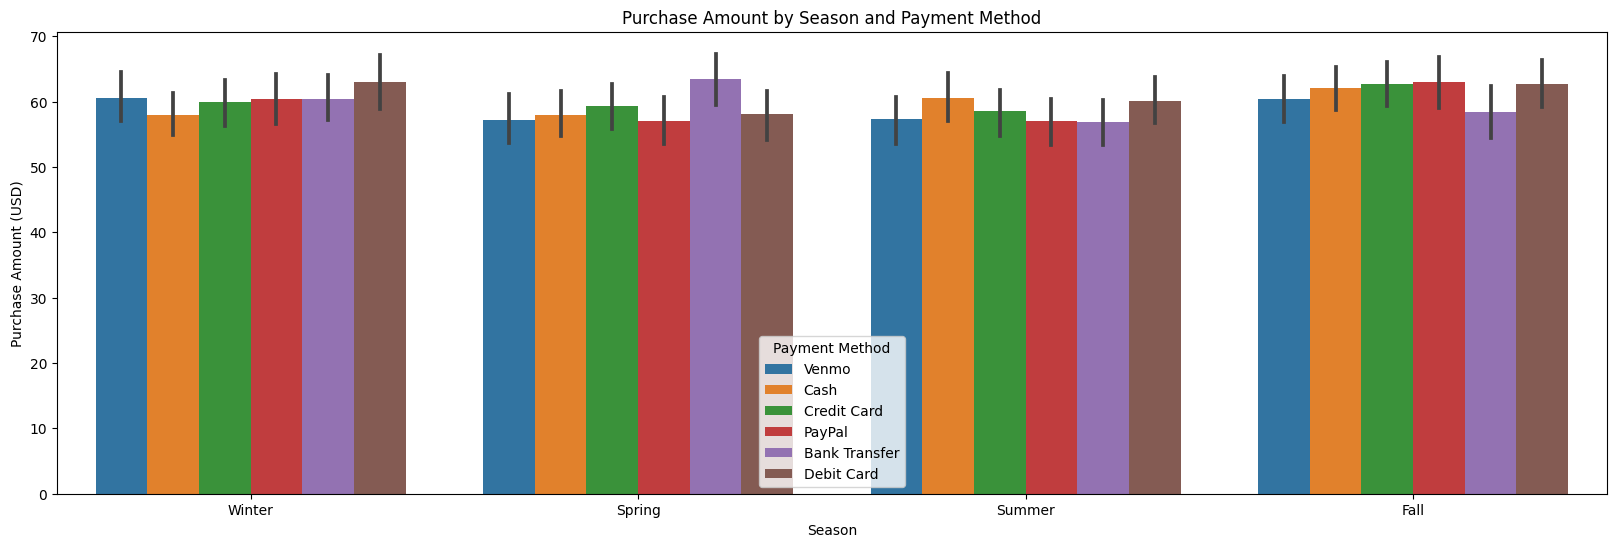

In [37]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Payment Method', data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()

Categorical Data Comparison: When comparing "Payment Method" with other categorical columns, a stacked bar chart or a grouped bar chart can be useful to visualize the distribution of payment methods within different categories. For example, you can compare "Payment Method" with "Gender" or "Category."


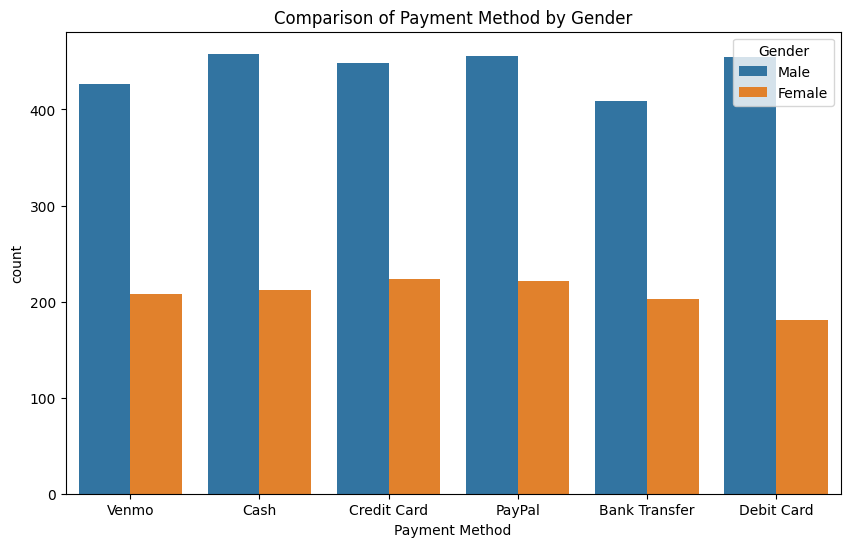

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stacked or grouped bar chart for comparing "Payment Method" with "Gender"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment Method', hue='Gender')
plt.title('Comparison of Payment Method by Gender')
plt.show()



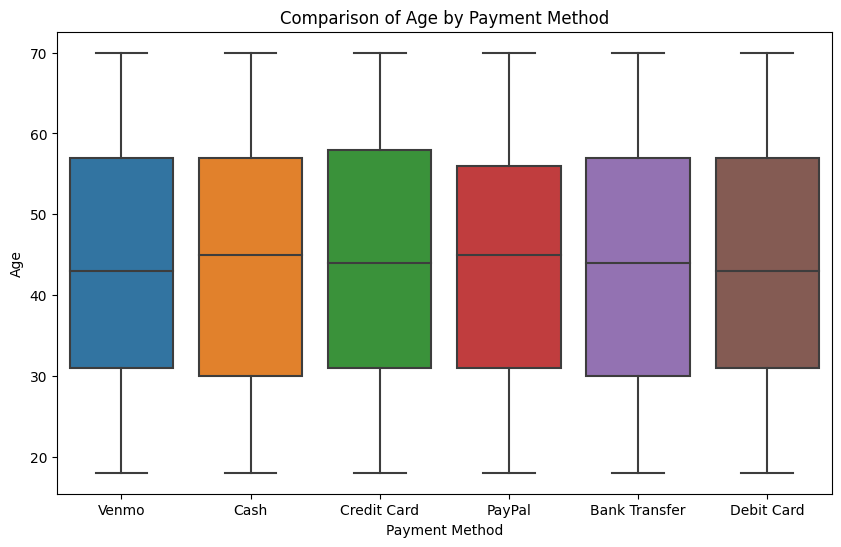

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for comparing "Payment Method" with "Age"
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Payment Method', y='Age')
plt.title('Comparison of Age by Payment Method')
plt.show()


A scatter plot is typically used to visualize the relationship between two continuous variables, making it more suitable for comparing two numerical columns. If you'd like to compare "Payment Method" with "Age," a scatter plot might not be the best choice since "Payment Method" is a categorical variable. However, if you want to compare "Age" with a numerical column while considering "Payment Method" as a categorical variable, you can use a swarm plot or a strip plot to achieve this.

In the swarm plot, individual data points are displayed, and their distribution within each "Payment Method" category can be seen. This provides a different perspective on the data compared to a box plot, as it shows the distribution of "Age" for each payment method.

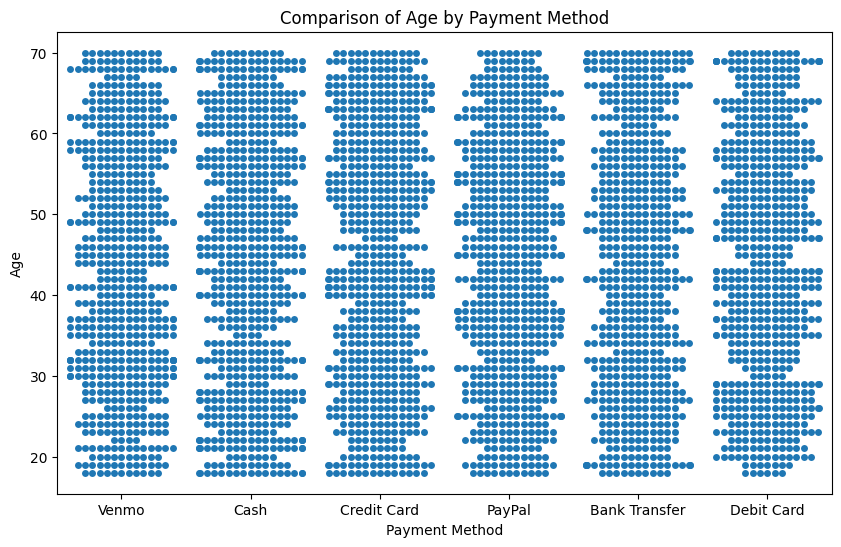

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Swarm plot for comparing "Payment Method" with "Age"
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Payment Method', y='Age')
plt.title('Comparison of Age by Payment Method')
plt.show()


comparing "Payment Method" with "Frequency of Purchases"

A bar chart is a suitable choice for comparing "Payment Method" with "Frequency of Purchases" because both of these variables are categorical. Here's why a bar chart is a good choice for this comparison:

Categorical Variables: Both "Payment Method" and "Frequency of Purchases" are categorical variables, meaning they consist of distinct categories or labels. A bar chart is well-suited for displaying the distribution of categorical data.

Comparison of Frequencies: A bar chart allows you to compare the frequencies or counts of each category (payment methods) within different subcategories (purchase frequencies). You can see how different payment methods are distributed across various purchase frequencies.

Visual Clarity: Bar charts use distinct bars for each category, making it easy to distinguish between payment methods. The use of different colors or patterns for each payment method further enhances visual clarity.

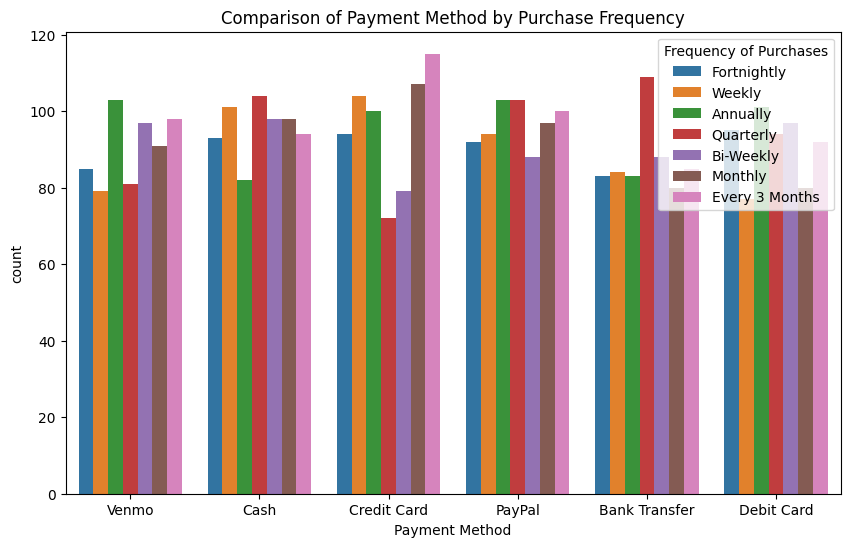

In [49]:
# Bar chart for comparing "Payment Method" with "Frequency of Purchases"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment Method', hue='Frequency of Purchases')
plt.title('Comparison of Payment Method by Purchase Frequency')
plt.show()



Create a stacked bar plot to compare "Payment Method" with "Season"

Reason for Using a Stacked Bar Plot:

Stacked bar plots are suitable when you want to visualize the distribution of a categorical variable (in this case, "Payment Method") across multiple categories of another categorical variable (in this case, "Season").
They make it easy to compare how payment methods are distributed within each season, showing the proportion of each payment method for every season category.
The use of different colors for payment methods within each season category makes it visually intuitive to understand the distribution.
By using a stacked bar plot, you can gain insights into how payment methods vary across different seasons, helping you understand if there are any seasonal trends or patterns in payment preferences.

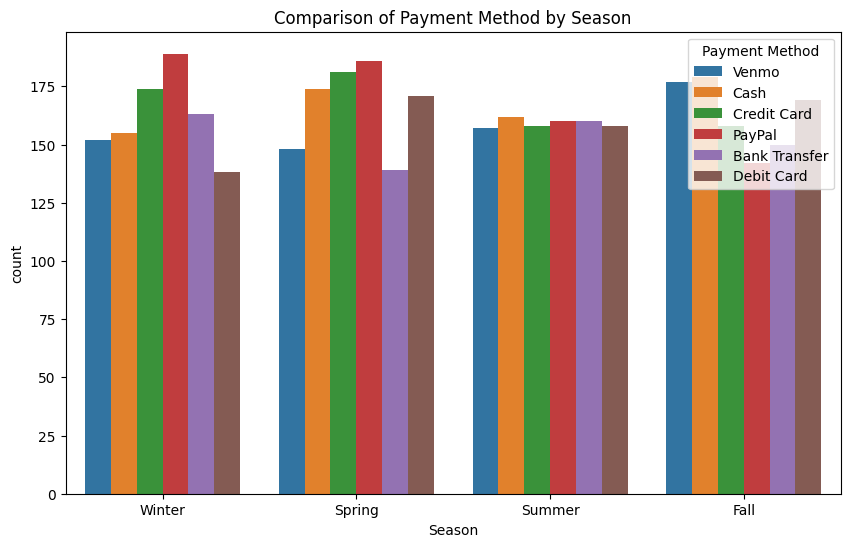

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a stacked bar plot to compare "Payment Method" with "Season"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Season', hue='Payment Method')
plt.title('Comparison of Payment Method by Season')
plt.show()


 Create a grouped bar chart to compare "Payment Method" with "Location"

Reason for Using a Grouped Bar Chart:

A grouped bar chart allows you to display multiple categorical variables side by side for easy comparison.
In this case, you can compare the distribution of payment methods within each location, making it clear how payment methods vary based on location.
The use of different colors for payment methods within each location category helps visualize the distribution effectively.

A scatter plot or a line chart is typically used to show the relationship between two continuous variables or to visualize data points over a continuous range, such as time. In the context of comparing "Payment Method" with "Location," both variables are categorical, and using a scatter plot or line chart is not the most appropriate choice. These types of plots are best suited for continuous data or for showing trends over a continuous range.

To compare categorical variables like "Payment Method" and "Location," a grouped bar chart (as previously suggested) is a more suitable option. Grouped bar charts allow you to display and compare the distribution of different categories within multiple groups or subcategories, making it easy to see how payment methods vary across different locations. This type of chart is a common choice when dealing with categorical data comparison.

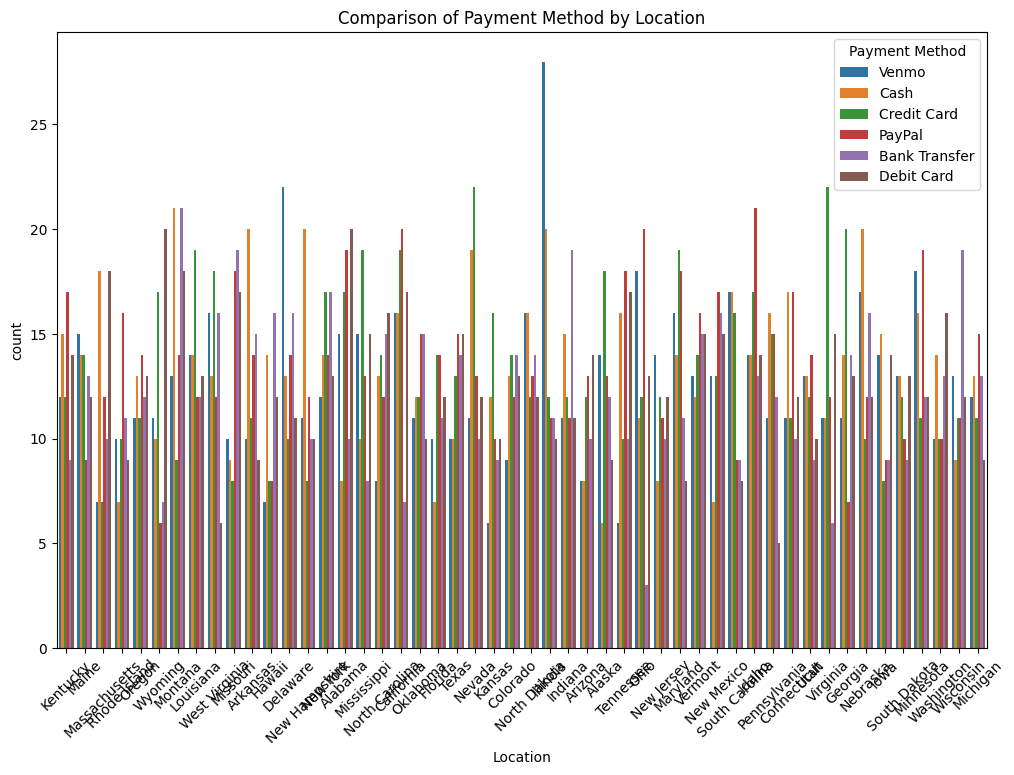

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar chart to compare "Payment Method" with "Location"
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Location', hue='Payment Method')
plt.title('Comparison of Payment Method by Location')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Frequency of Purchases

Frequency of Purchases vs. Age - Box Plot:

Plot: Box plot
Explanation: A box plot can help you visualize the distribution of age for each frequency category. This can provide insights into whether certain age groups are more likely to make purchases more frequently.

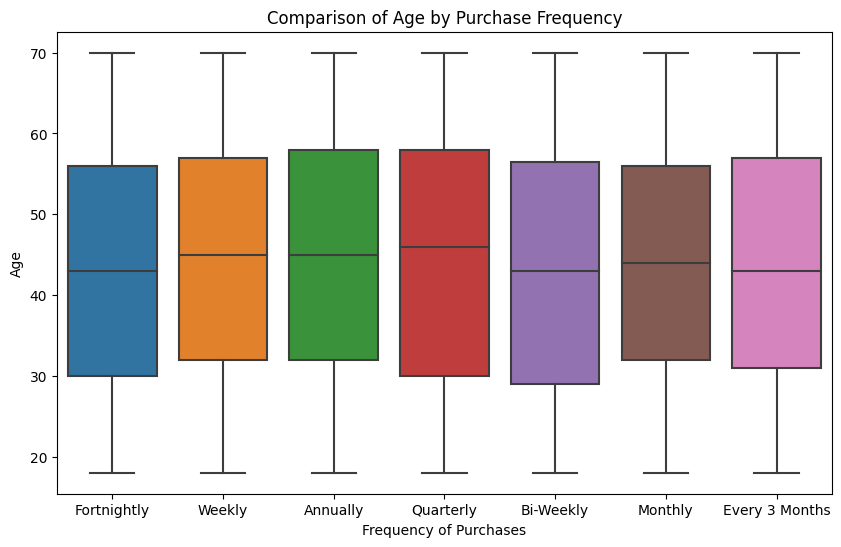

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Frequency of Purchases', y='Age')
plt.title('Comparison of Age by Purchase Frequency')
plt.show()


Frequency of Purchases vs. Review Rating - Violin Plot:

Plot: Violin plot
Explanation: A violin plot will show the distribution of review ratings for each purchase frequency, allowing you to see the shape of the distribution and potential differences in ratings among different purchase frequencies.

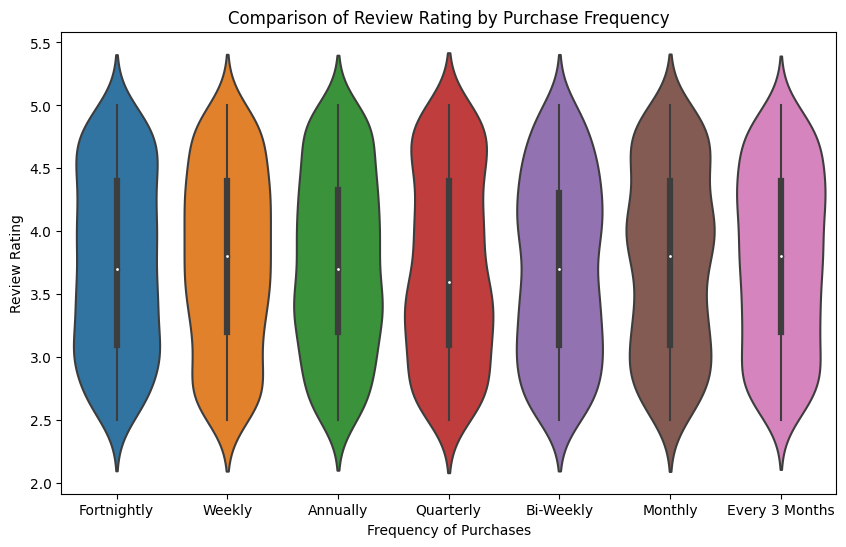

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Frequency of Purchases', y='Review Rating')
plt.title('Comparison of Review Rating by Purchase Frequency')
plt.show()


Frequency of Purchases vs. Location - Bar Plot:

Plot: Bar plot
Explanation: A bar plot can help you compare the frequency of purchases in different locations. It allows you to see which locations have the highest and lowest purchase frequencies.

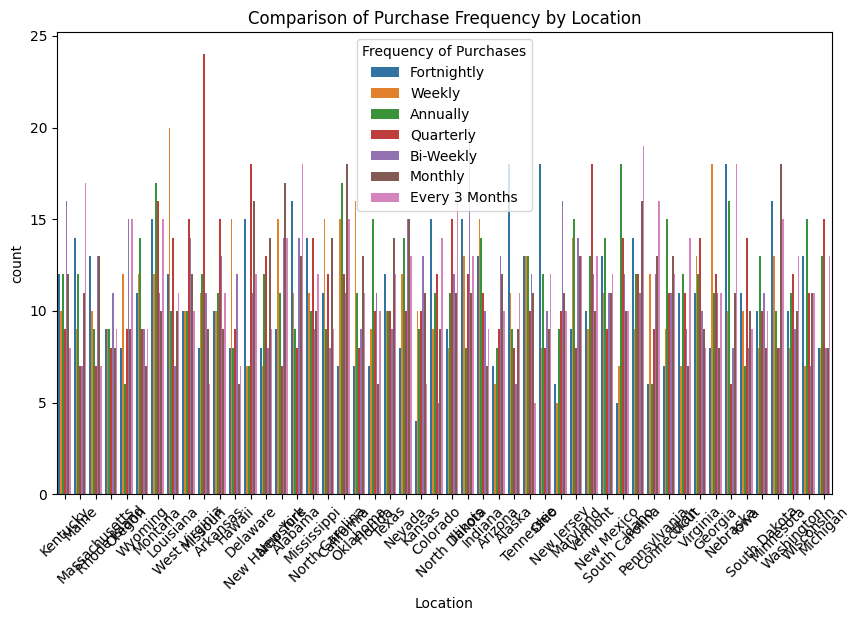

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location', hue='Frequency of Purchases')
plt.title('Comparison of Purchase Frequency by Location')
plt.xticks(rotation=45)
plt.show()


Frequency of Purchases vs. Category - Stacked Bar Plot:

Plot: Stacked bar plot
Explanation: A stacked bar plot can help you compare the distribution of purchase categories within each purchase frequency category. This can provide insights into the most common categories for different purchase frequencies.

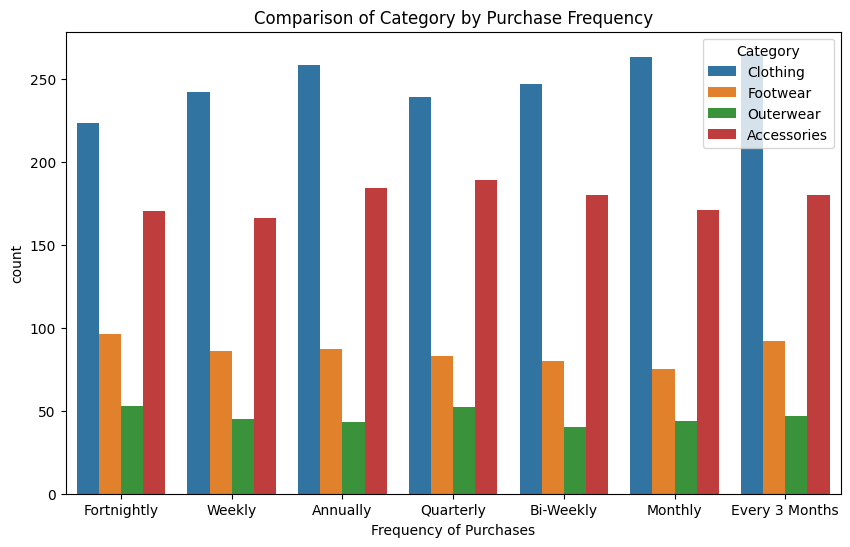

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Frequency of Purchases', hue='Category')
plt.title('Comparison of Category by Purchase Frequency')
plt.show()


5. Pie Chart (Proportion of Purchase Frequencies):

A pie chart can display the proportion of different purchase frequencies.

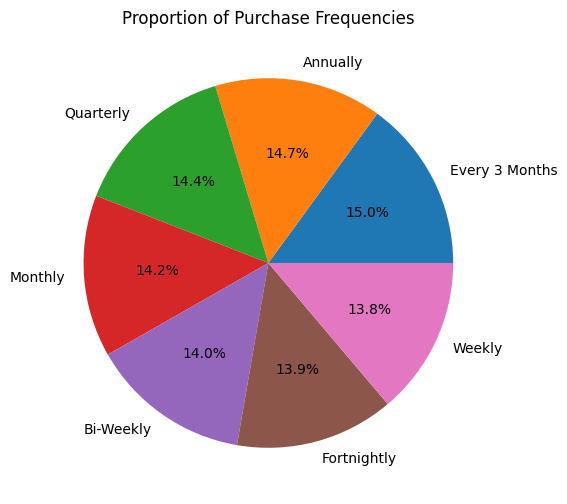

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
frequency_counts = df['Frequency of Purchases'].value_counts()
plt.pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Purchase Frequencies')
plt.show()


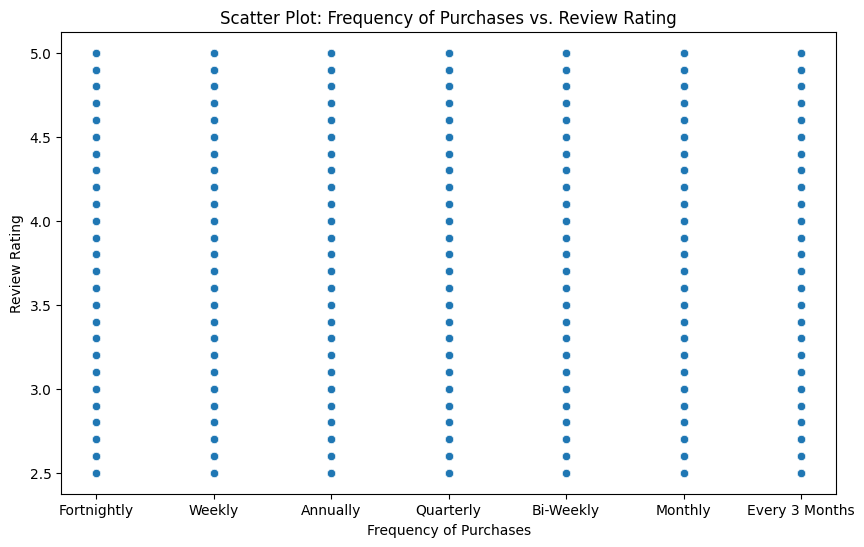

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Frequency of Purchases', y='Review Rating')
plt.title('Scatter Plot: Frequency of Purchases vs. Review Rating')
plt.show()


To create meaningful insights and visualizations for payment methods in your data set, you can use different types of charts based on the relationships you want to explore. Here are some suggestions for each type of chart you mentioned:

Line Chart:

Use a line chart to show the trend of "Purchase Amount (USD)" over time, with time on the x-axis and "Payment Method" on the y-axis. This can help you analyze how different payment methods are performing in terms of purchase amount over time.
Bar Chart:

Create a bar chart to compare the total "Purchase Amount (USD)" for each "Payment Method." This will give you a clear view of which payment methods are the most popular or generate the most revenue.
Stacked Bar Chart:

Use a stacked bar chart to show the distribution of "Payment Methods" within each "Category" of items purchased. This can help you understand the preferred payment methods for different product categories.
100% Stacked Bar Chart:

A 100% stacked bar chart can be used to visualize the relative proportions of payment methods within different "Categories" or "Locations." This will show the percentage composition of payment methods in each category or location.
Pie Chart:

Create a pie chart to display the distribution of "Payment Methods" in your data. This will give you a quick overview of the overall popularity of each payment method.
Area Chart:

An area chart can be used to visualize the cumulative "Purchase Amount (USD)" over time for different payment methods. This will help you see which payment methods contribute the most to the total purchase amount.
Combination Chart:

A combination chart combines multiple chart types (e.g., line chart and bar chart) to show different aspects of your data simultaneously. You could use this to compare the "Review Rating" and "Purchase Amount (USD)" for each payment method over time.
Scatter Chart:

Create a scatter chart to explore the relationship between "Review Rating" and "Purchase Amount (USD)" for each payment method. This can help you understand if there's a correlation between review ratings and purchase amounts based on payment methods.
The choice of chart type depends on the specific insights you want to gain from your data and the relationships you want to explore. Consider the nature of your data and the questions you want to answer when selecting the most appropriate chart type.

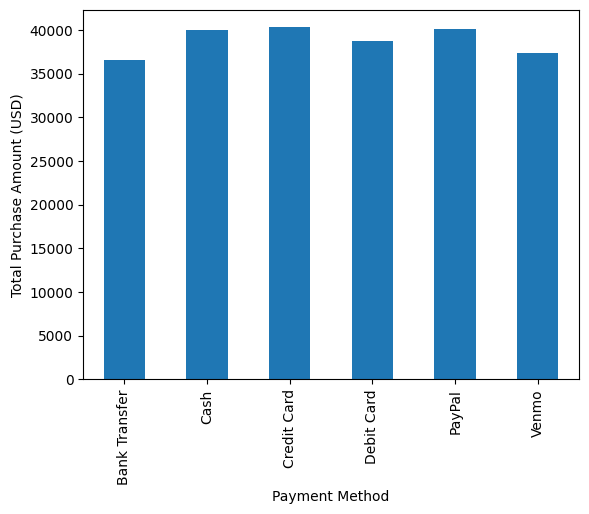

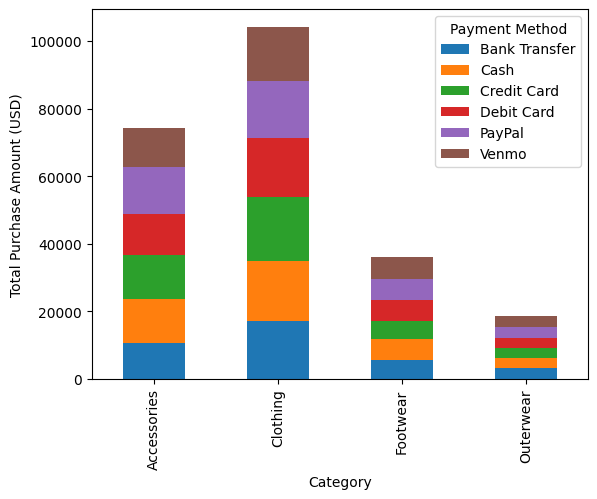

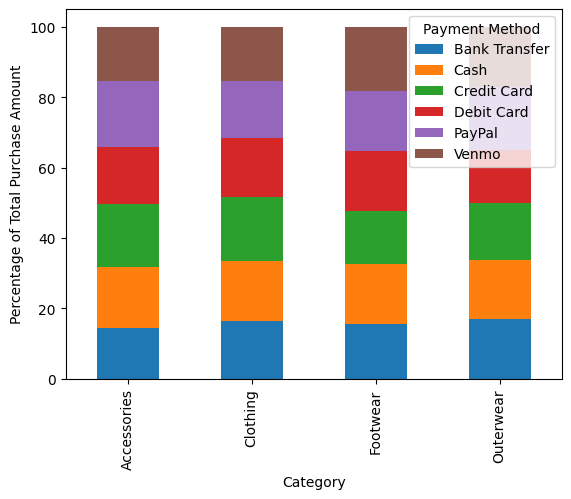

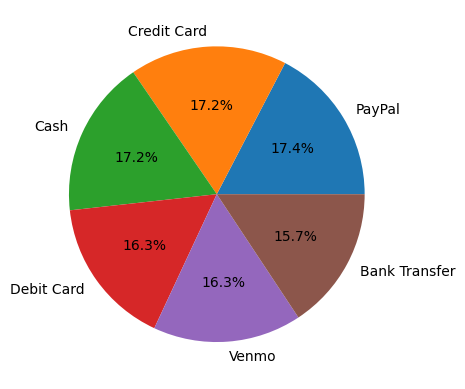

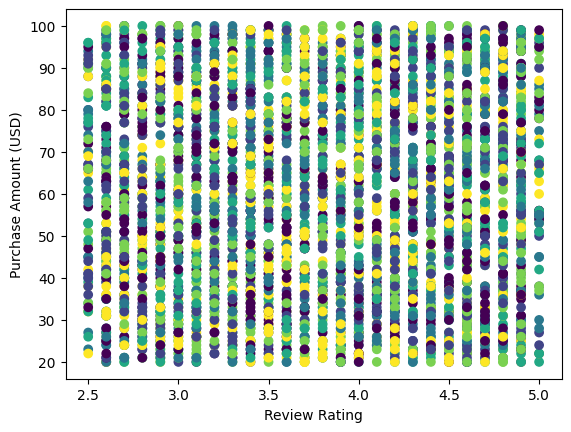

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your data loaded into a DataFrame named 'df'



# 2. Bar Chart
payment_method_totals = df.groupby('Payment Method')['Purchase Amount (USD)'].sum()
payment_method_totals.plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

# 3. Stacked Bar Chart
stacked_data = df.groupby(['Category', 'Payment Method'])['Purchase Amount (USD)'].sum().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.legend(title='Payment Method')
plt.show()

# 4. 100% Stacked Bar Chart
stacked_data = stacked_data.div(stacked_data.sum(1), axis=0) * 100
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Percentage of Total Purchase Amount')
plt.legend(title='Payment Method')
plt.show()

# 5. Pie Chart
payment_method_counts = df['Payment Method'].value_counts()
payment_method_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()



# 7. Combination Chart
# Combine a line chart and a bar chart for review rating and purchase amount

# 8. Scatter Chart
plt.scatter(df['Review Rating'], df['Purchase Amount (USD)'], c=df['Payment Method'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')
plt.show()
